<a href="https://colab.research.google.com/github/rohailkhan/Acomputer_vision/blob/main/20_CIFAR_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Summary**



In [1]:
# LIBARIES

from keras.datasets import cifar10
# libraries for pr-processing and plotting
import numpy as np
import tensorflow as tf
from numpy import asarray
import matplotlib.pyplot as plt


# for plotting model  and transfer learning
from keras import utils
from keras.layers import Input
#Libraries for CNN
from keras.models import Sequential , Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
# Optimizers
from keras import optimizers

In [13]:
(trainX, trainY), (testX, testY) = cifar10.load_data() 


In [14]:
(trainX.shape, trainY.shape), (testX.shape, testY.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

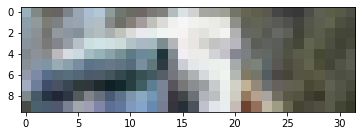

In [4]:
plt.imshow(trainX[1][0:32][0:10])
plt.show()

In [5]:
trainY =tf.keras.utils.to_categorical(trainY)


In [6]:
testY =tf.keras.utils.to_categorical(testY )

In [7]:
trainX, testX = trainX.astype('float32')/255.0, testX.astype('float32')/255.0

## Define functions :
1 - load_dataset cifar10 :  just load data, in train and test features/labels and convert labels to cat


2 - prep_pixels : normalize the feautres between 0 and 1 and change to float

3 - define_model

4 - plot_diagnostics i.e loss vs val_loss and accuracy vs validation_accuracy

5 - run_model_harness which fits model (with history) ad evlauate model (to get accuracy) and plot_diagnostics


In [102]:
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data() 
    trainY =tf.keras.utils.to_categorical(trainY)
    testY =tf.keras.utils.to_categorical(testY)
    return (trainX, trainY), (testX, testY)

# for feature pr-processing .     
def prep_pixels(trainX, testX):
    trainX1=trainX.astype('float32')
    trainX1=trainX1/255.0 
    testX1=testX.astype('float32')
    testX1=testX1/255.
    return (trainX1, testX1)

def base_model():
    model=Sequential()
    model.add(Conv2D(filters=32 , kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))
    
    model.add(Conv2D(filters=64 , kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))

    model.add(Flatten())
    model.add(Dense(units=100,activation='relu'))
    model.add(Dense(units=10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model


def plot_diagnostics(history):
    fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
    axx[0].plot(range(0,10),history['loss'],color='green',label='Training Loss')
    axx[0].plot(range(0,10),history['val_loss'], color='red' ,label='Validation Loss')
    axx[0].set_title('Training Vs Validation Loss')
    axx[0].set_ylabel('Loss')
    axx[0].set_xlabel('Epochs')
    axx[0].legend()

    axx[1].plot(range(0,10),history['accuracy'],color='green',label='Training accuracy')
    axx[1].plot(range(0,10),history['val_accuracy'], color='red' ,label='Validation accuracy')
    axx[1].set_title('Training Vs Validation Accuracy')
    axx[1].set_ylabel('Accuracy')
    axx[1].set_xlabel('Epochs')
    axx[1].legend()

    plt.show()


def run_model_harness():
    (trainX, trainY), (testX, testY)= load_dataset()
    (trainX, testX)=prep_pixels(trainX, testX)
    model=base_model()
    history=model.fit(x=trainX,y=trainY,batch_size=100,epochs=10 , validation_data=(testX, testY),verbose=1)
    
    losses , accuracy =model.evaluate(testX, testY)
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print('Final modal accuracy={} loss={}'.format(accuracy*100, losses))
    
    history1=history.history
    plot_diagnostics(history1)


Epoch 1/10
500/500 [==============================] - 6s 12ms/step - loss: 1.5589 - accuracy: 0.4408 - val_loss: 1.3005 - val_accuracy: 0.5360
Epoch 2/10
500/500 [==============================] - 5s 10ms/step - loss: 1.2134 - accuracy: 0.5740 - val_loss: 1.1264 - val_accuracy: 0.6127
Epoch 3/10
500/500 [==============================] - 5s 10ms/step - loss: 1.0751 - accuracy: 0.6239 - val_loss: 1.0683 - val_accuracy: 0.6239
Epoch 4/10
500/500 [==============================] - 5s 9ms/step - loss: 0.9876 - accuracy: 0.6567 - val_loss: 0.9846 - val_accuracy: 0.6581
Epoch 5/10
500/500 [==============================] - 5s 9ms/step - loss: 0.9238 - accuracy: 0.6774 - val_loss: 0.9789 - val_accuracy: 0.6603
Epoch 6/10
500/500 [==============================] - 4s 9ms/step - loss: 0.8645 - accuracy: 0.7007 - val_loss: 1.0037 - val_accuracy: 0.6443
Epoch 7/10
500/500 [==============================] - 4s 9ms/step - loss: 0.8127 - accuracy: 0.7181 - val_loss: 0.9237 - val_accuracy: 0.6838
Epo

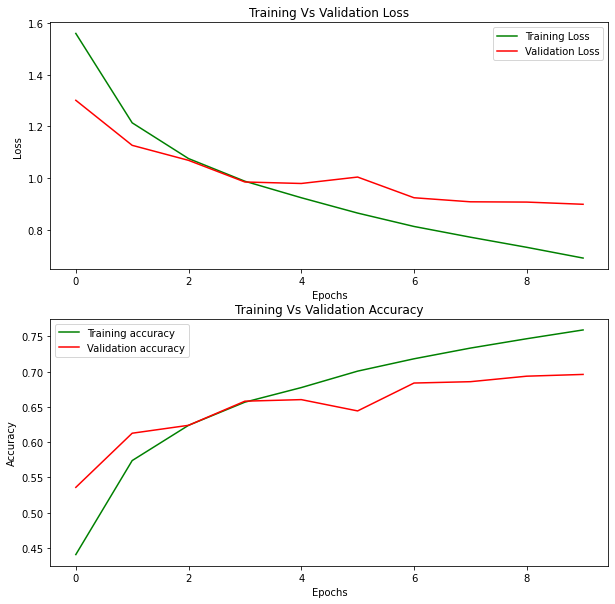

In [103]:
run_model_harness()

## Saving Model
### 1- Saving Model and History

In [104]:
# saving model

path='/content/drive/MyDrive/20210309_Files/'
model_path=path +'/CIFAR1.h5'
# saving model
model.save(model_path,overwrite=True)

In [105]:
# saving model history 
import json

# # Save it under the form of a json file
history_path=path +'/CIFAR_history1.json'
json.dump(str(history1), open(history_path, 'w'))

## Plotting from the saved History

In [108]:
path='/content/drive/MyDrive/20210309_Files/'
history_path=path +'/CIFAR_history1.json'
history1= json.load(open(history_path, 'r'))

TypeError: ignored

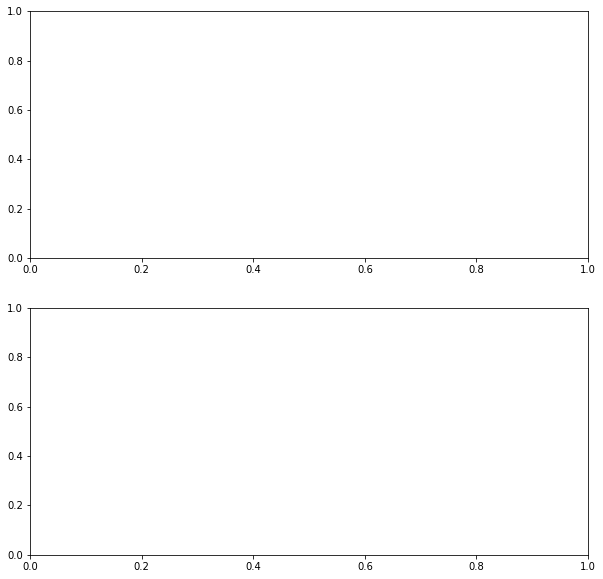

In [109]:
fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
axx[0].plot(range(0,10),history1['loss'],color='green',label='Training Loss')
axx[0].plot(range(0,10),history1['val_loss'], color='red' ,label='Validation Loss')
axx[0].set_title('Training Vs Validation Loss')
axx[0].set_ylabel('Loss')
axx[0].set_xlabel('Epochs')
axx[0].legend()

axx[1].plot(range(0,10),history1['accuracy'],color='green',label='Training accuracy')
axx[1].plot(range(0,10),history1['val_accuracy'], color='red' ,label='Validation accuracy')
axx[1].set_title('Training Vs Validation Accuracy')
axx[1].set_ylabel('Accuracy')
axx[1].set_xlabel('Epochs')
axx[1].legend()

plt.show()

## **Why error in plotting loaded History in json format?**

In [110]:
# The loaded history is in String format.Converting it back to
# dictionary
import ast
history2=ast.literal_eval(history1)

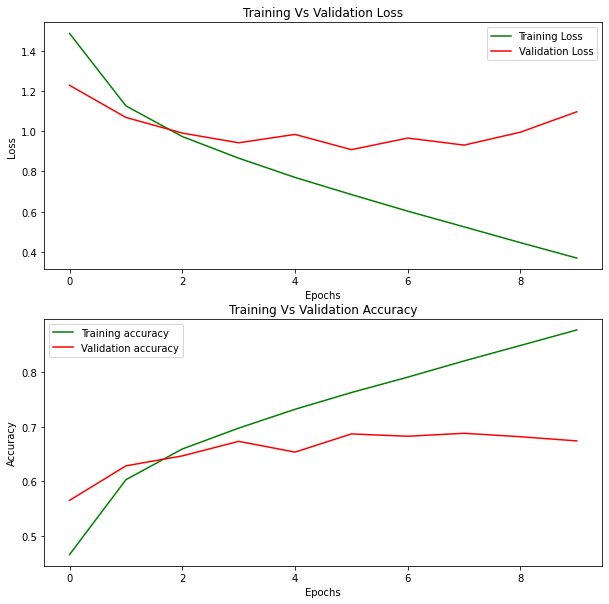

In [111]:
fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
axx[0].plot(range(0,10),history2['loss'],color='green',label='Training Loss')
axx[0].plot(range(0,10),history2['val_loss'], color='red' ,label='Validation Loss')
axx[0].set_title('Training Vs Validation Loss')
axx[0].set_ylabel('Loss')
axx[0].set_xlabel('Epochs')
axx[0].legend()

axx[1].plot(range(0,10),history2['accuracy'],color='green',label='Training accuracy')
axx[1].plot(range(0,10),history2['val_accuracy'], color='red' ,label='Validation accuracy')
axx[1].set_title('Training Vs Validation Accuracy')
axx[1].set_ylabel('Accuracy')
axx[1].set_xlabel('Epochs')
axx[1].legend()

plt.show()

# Using Model Evalutation (only) on the Test Data
This time ,no training is required. Simply load the previously saved model (that was trainined using the training data)

In [107]:
losses , accuracy =model.evaluate(testX, testY)
print('Final modal accuracy={} loss={}'.format(accuracy*100, losses))

313/313 [==============================] - 2s 5ms/step - loss: 1.0960 - accuracy: 0.6738
Final modal accuracy=67.3799991607666 loss=1.0960166454315186


# Predictions


```
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
```



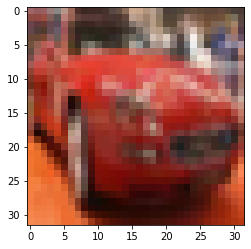

In [123]:
plt.imshow(trainX[5])

In [114]:
image_path='/content/drive/MyDrive/20210309_Datasets/red_car.png'
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
model=load_model(filepath='/content/drive/MyDrive/20210309_Files/CIFAR1.h5')

In [115]:
image=load_img(path=image_path,target_size=(32,32,3))


In [116]:
image=np.array(image)
image.shape

(32, 32, 3)

In [119]:
image=image.reshape(1,32,32,3)

In [120]:
image=image.astype('float32')/255.0
prediction=model.predict(image)
prediction

array([[1.0619615e-01, 3.9480024e-04, 8.7428028e-03, 4.8378676e-01,
        2.2633836e-01, 5.5588165e-04, 1.1400846e-02, 1.3267897e-03,
        1.6125719e-01, 4.1177648e-07]], dtype=float32)

In [121]:
prediction.argmax()

3

The above prediction is not right since our model still has less accuracy

# Using pre-trained models

In [ ]:
from numpy import asarray
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import utils

In [ ]:
(trainX.shape, trainY.shape), (testX.shape, testY.shape)

(((60000, 28, 28, 1), (60000, 10)), ((10000, 28, 28, 1), (10000, 10)))

In [ ]:
trainX ,testX =trainX.reshape(60000,28,28,1) , testX.reshape(10000,28,28,1)

In [ ]:
image_path='/content/drive/MyDrive/20210309_Datasets/sandle.png'
image=load_img(path=image_path,target_size=(224,224) ,grayscale='True')

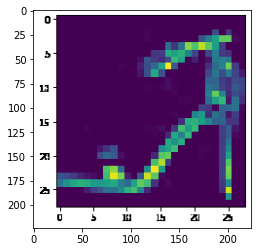

In [ ]:
plt.imshow(image)

In [ ]:
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

image = load_img(image_path, target_size=(224,224))
# # convert the image pixels to a numpy array
image = np.array(image)
# # reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label1 = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label1[1], label1[2]*100))

digital_clock (39.83%)


## Reamining Tasks


1.   Make functions for loading and preprocessing
2.   Make function for model and training

2.   Use kfold splits for training

